For writing the narrative and exporting data.

In [1]:
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt

S_TOTALS = pickle.load(open('../data/S_Sex_Graduates.p', 'rb'))
E_TOTALS = pickle.load(open('../data/E_Sex_Graduates.p', 'rb'))
D_TOTALS = pickle.load(open('../data/SE-Detailed_Sex.p', 'rb'))

years = sorted(S_TOTALS.keys())
institutions = sorted(S_TOTALS[ max(years) ].keys())
fields = {
    'Science': set(),
    'Engineering': set()
}
for year in years:
    inst_stats = D_TOTALS[year]['Columbia University in the City of New York']
    for seh in inst_stats.keys():
        for field in inst_stats[seh].keys():
            fields[seh].add(field)
fields['Science'] = sorted(fields['Science'])
fields['Engineering'] = sorted(fields['Engineering'])

print(f'Data set describes years {min(years)} - {max(years)} for {len(institutions)} institutions and {len(fields["Science"]) + len(fields["Engineering"])} fields.')                                                                                                                   

Data set describes years 1994 - 2016 for 11 institutions and 39 fields.


In [53]:
def get_total_proportions(totals, inst='Columbia University in the City of New York'):
    props = []
    for year in years:
        inst_data = totals[year].get(inst, None)
        if inst_data is None:
            props.append(None)
        else:
            props.append(inst_data['Female'] / inst_data['Total for selected values'])
    return props

def plot_peer_proportions(ax, totals, title, highlight='Columbia University in the City of New York',
                          peer_color='lightgray', highlight_color='black'):
    for inst in institutions:
        if inst != highlight:
            ax.plot(years, get_total_proportions(totals, inst), color=peer_color)
    ax.plot(years, get_total_proportions(totals, highlight), color=highlight_color, linewidth=3)
    
    ax.plot(years, [0.5 for _ in years], color='lightgray', linestyle='--')
    ax.set_ylim(bottom=0, top=1)
    
    ax.set_title(title)
    ax.set_ylabel('Proportion female')
    ax.grid()

def get_total_counts(totals, inst='Columbia University in the City of New York', default=None):
    female, male = [], []
    for year in years:
        inst_data = totals[year].get(inst, None)
        if inst_data is None:
            female.append(None)
            male.append(None)
        else:
            female.append(inst_data['Female'])
            male.append(inst_data['Male'])
    return female, male

def plot_total_connected(ax, totals, title, inst='Columbia University in the City of New York'):
    f, m = get_total_counts(totals, inst)
    ax.plot(f, m, color='lightgray')
    ax.scatter(f, m, c=[i for i in range(len(m))], cmap='viridis')

    for i in [0, -1]:
        ax.annotate(years[i], (f[i], m[i]))
    
    _, ymax = ax.get_ylim()
    _, xmax = ax.get_xlim()
    top = max(ymax, xmax)
    
    ax.set_ylim(bottom=0, top=top)
    ax.set_xlim(left=0, right=top)
    
    ax.plot([0, top], [0, top], color='gray', linestyle='--')

    ax.set_title(title)
    ax.set_xlabel('Number of women')
    ax.set_ylabel('Number of men')

def get_proportions(seh, field, inst='Columbia University in the City of New York'):
    proportions = []
    for year in years:
        field_stats = D_TOTALS[year][inst][seh].get(field, None)
        if field_stats is None:
            proportions.append(None)
        else:
            proportions.append(field_stats.get('Female', 0) / field_stats['Total for selected values'])
    return proportions

def plot_proportions(ax, seh, field, title, inst='Columbia University in the City of New York'):
    ax.plot(years, get_proportions(seh, field, inst))
    ax.plot(years, [0.5 for _ in years], color='lightgray', linestyle='--')
    ax.set_ylim(bottom=0, top=1)    
    ax.set_title(title)
    ax.set_ylabel('Proportion female')
    ax.grid()

def get_counts(seh, field, inst='Columbia University in the City of New York', separate=False):
    female = []
    male = []
    for year in years:
        field_stats = D_TOTALS[year][inst][seh].get(field, None)
        if field_stats is None:
            female.append(None)
            male.append(None)
        else:
            female.append(int(field_stats.get('Female', 0)))
            male.append(int(field_stats.get('Male', 0)))
    return female, male if separate else [list(x) for x in zip(female, male)]

def plot_counts(ax, seh, field, title, inst='Columbia University in the City of New York'):
    females, males = get_counts(seh, field, inst, separate=True)
    ax.plot(years, females, label='Female')
    ax.plot(years, males, label='Male')
    ax.legend()
    ax.set_title(title)
    ax.set_ylabel('Number of people')

def plot_connected(ax, seh, field, title, inst='Columbia University in the City of New York'):
    f, m = get_counts(seh, field, inst, separate=True)
    ax.plot(f, m, color='lightgray')
    ax.scatter(f, m, c=[i for i in range(len(m))], cmap='viridis')

    for i in [0, -1]:
        ax.annotate(years[i], (f[i], m[i]))
    
    _, ymax = ax.get_ylim()
    _, xmax = ax.get_xlim()
    top = max(ymax, xmax)
    
    ax.set_ylim(bottom=0, top=top)
    ax.set_xlim(left=0, right=top)
    
    ax.plot([0, top], [0, top], color='gray', linestyle='--')

    ax.set_title(title)
    ax.set_xlabel('Number of women')
    ax.set_ylabel('Number of men')

## Lede

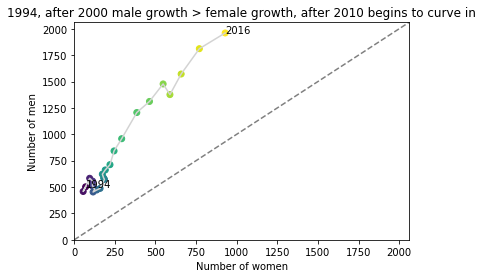

In [37]:
_, ax = plt.subplots()
plot_total_connected(ax, E_TOTALS, '1994, after 2000 male growth > female growth, after 2010 begins to curve in')

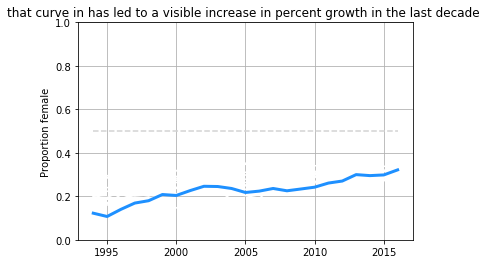

In [24]:
_, ax = plt.subplots()
plot_peer_proportions(ax, E_TOTALS, 
                      'that curve in has led to a visible increase in percent growth in the last decade ',
                      peer_color='white',
                      highlight_color='dodgerblue')

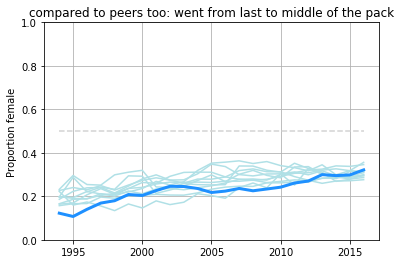

In [25]:
_, ax = plt.subplots()
plot_peer_proportions(ax, E_TOTALS, 'compared to peers too: went from last to middle of the pack',
                      peer_color='powderblue', 
                      highlight_color='dodgerblue')

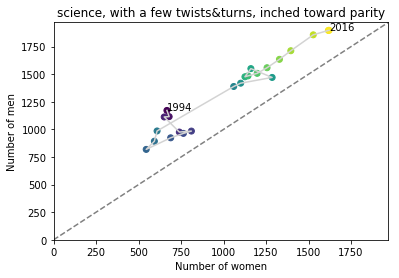

In [26]:
_, ax = plt.subplots()
plot_total_connected(ax, S_TOTALS, 'science, with a few twists&turns, inched toward parity')

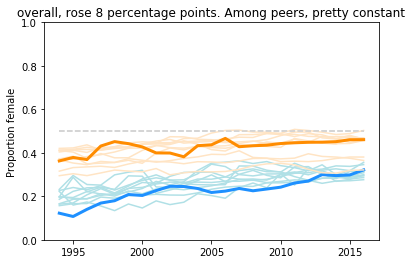

In [27]:
_, ax = plt.subplots()
plot_peer_proportions(ax, E_TOTALS, '', peer_color='powderblue', highlight_color='dodgerblue')
plot_peer_proportions(ax, S_TOTALS, 'overall, rose 8 percentage points. Among peers, pretty constant',
                      peer_color='bisque', highlight_color='darkorange')

Text(0.5, 1.0, 'But each field has its own story.')

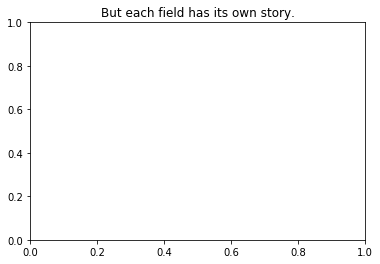

In [32]:
_, ax = plt.subplots()
ax.set_title('But each field has its own story.')

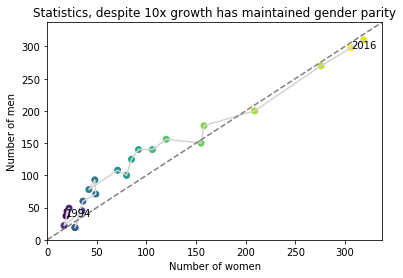

In [39]:
_, ax = plt.subplots()
plot_connected(ax, 'Science', 'Statistics', 'Statistics, despite 10x growth has maintained gender parity')

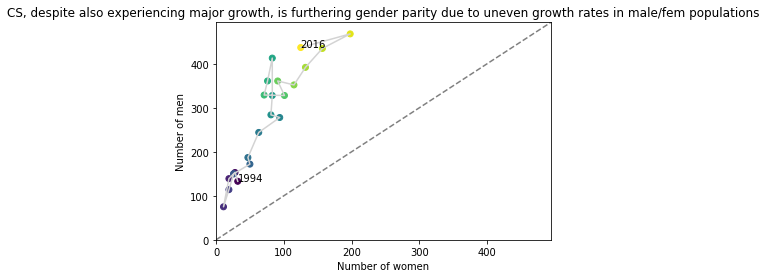

In [41]:
_, ax = plt.subplots()
plot_connected(ax, 'Science', 'Computer sciences', 
               'CS, despite also experiencing major growth, is furthering gender parity due to uneven growth rates in male/fem populations')

## Nutgraf

The Eye has conducted an analysis of NSF data.

Overall, though gender diversity within the student body has increased, there are certain fields that have been "left behind."

Broader trends, pipeline programs, Advancement of Women.

## In male-dominated engineering fields, disparate rates of joining

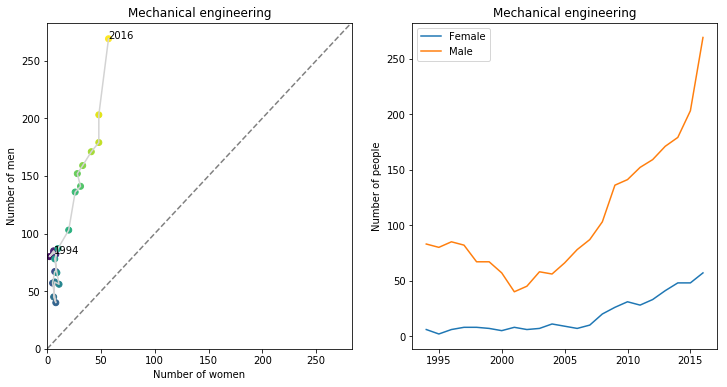

In [56]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_connected(ax[0], 'Engineering', 'Mechanical engineering', 'Mechanical engineering')
plot_counts(ax[1], 'Engineering', 'Mechanical engineering', 'Mechanical engineering')

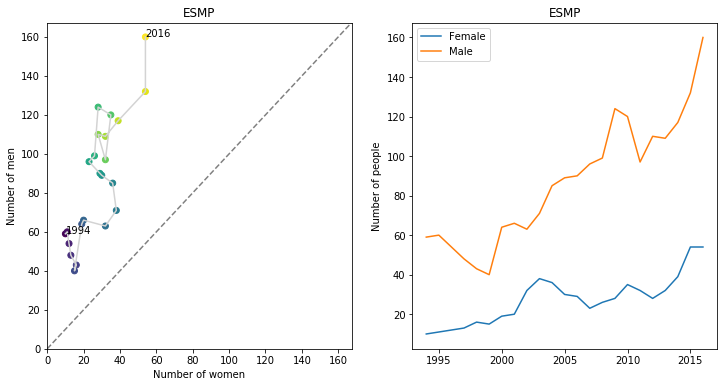

In [57]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_connected(ax[0], 'Engineering', 'Engineering science, mechanics, and physics', 'ESMP')
plot_counts(ax[1], 'Engineering', 'Engineering science, mechanics, and physics', 'ESMP')

In [18]:
selected_fields = {
    'Engineering': ['Mechanical engineering'],
    'Science': ['Statistics', 'Computer sciences'],
}

data = {
    'DISCIPLINES': {
        'Science': {inst: get_total_proportions(S_TOTALS, inst) for inst in institutions},
        'Engineering': {inst: get_total_proportions(E_TOTALS, inst) for inst in institutions},
    },
    'FIELD_PROPORTIONS': { inst: {} for inst in institutions },
    'FIELD_COUNTS': {},
}

for discipline, fields in selected_fields.items():
    for field in fields:
        data['FIELD_COUNTS'][field] = get_counts(discipline, field)
        for inst in institutions:
            data['FIELD_PROPORTIONS'][inst][field] = get_proportions(discipline, field, inst)
    
# sickeningly custom file path for convenience
with open('../../graduate-diversity/src/data.js', 'w') as out:
    json_str = json.dumps(data)
    out.write(f'export default {json_str};');